# Fashion - MNIST (LABEL 0 AND 1)
* In this notebook, I aim to improve myself in this field by manually implementing and evaluating different models on a binary classification problem (Fashion MNIST: labels 0 and 1). Throughout this process, I focus on model building, training, performance evaluation, and comparing manual implementations with Keras and Sklearn libraries. My ultimate goal is to strengthen both my theoretical understanding and practical skills before moving on to multi-class classification and more advanced models like CNNs.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")


In [5]:
print(f"Train Data Shape:{train_df.shape}")
train_df.head()

Train Data Shape:(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f"Test Data Shape:{test_df.shape}")
test_df.head()

Test Data Shape:(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df_binary= pd.concat([train_df[train_df["label"]==0],
                           train_df[train_df["label"]==1]],axis=0)
train_df_binary.shape

(12000, 785)

In [8]:
train_df_binary["label"].value_counts()

label
0    6000
1    6000
Name: count, dtype: int64

In [9]:
test_df_binary= pd.concat([test_df[test_df["label"]==0],
                           test_df[test_df["label"]==1]],axis=0)
test_df_binary.shape

(2000, 785)

In [10]:
test_df_binary["label"].value_counts()

label
0    1000
1    1000
Name: count, dtype: int64

In [11]:
X_data=train_df_binary.drop(["label"],axis=1)
Y_data=train_df_binary["label"]

print(f" X DATA SHAPE(train): {X_data.shape}")
print(f" Y DATA SHAPE(train): {Y_data.shape}")



 X DATA SHAPE(train): (12000, 784)
 Y DATA SHAPE(train): (12000,)


In [12]:
X_test = test_df_binary.drop("label", axis=1)
Y_test = test_df_binary["label"]

print(f"X TEST SHAPE:{X_test.shape}")
print(f"Y TEST SHAPE:{Y_test.shape}")

X TEST SHAPE:(2000, 784)
Y TEST SHAPE:(2000,)


## DATA VISUALIZATION

In [13]:
img_size=int(np.sqrt(X_data.shape[1]))
img_size

28

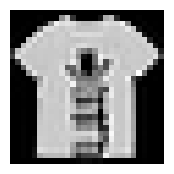

In [14]:
plt.figure(figsize=(4,2))
img1=X_data.iloc[2].values
img1=img1.reshape((img_size,img_size)) # re-shape the img to see 28x28
plt.imshow(img1,cmap="gray")
plt.axis("off")
plt.show()


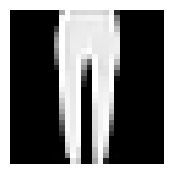

In [15]:
#label =1  
plt.figure(figsize=(4,2))
img2=X_data[Y_data==1].iloc[0].values
img2=img2.reshape((img_size,img_size))
plt.imshow(img2,cmap="gray")
plt.axis("off")
plt.show()

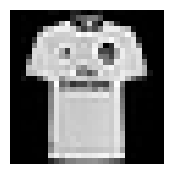

In [16]:
# visualization of test set
plt.figure(figsize=(4,2))
img1_test=X_test[Y_test==0].iloc[0].values
img1_test=img1_test.reshape((img_size,img_size))
plt.imshow(img1_test,cmap="gray")
plt.axis("off")
plt.show()

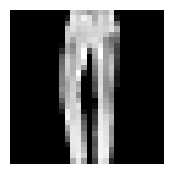

In [15]:
plt.figure(figsize=(4,2))
img2_test=X_test[Y_test==1].iloc[0].values
img2_test=img2_test.reshape((img_size,img_size))
plt.imshow(img2_test,cmap="gray")
plt.axis("off")
plt.show()

## Data Preprocessing 
* First, I'll split the data into training and validation sets, train the model, then evaulete its performance using the test set.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val= train_test_split (X_data,Y_data, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (9600, 784)
Y_train shape: (9600,)


In [18]:
# Formatting the training and validation data for the model
Y_train=Y_train.values.reshape(-1,1).T
Y_val=Y_val.values.reshape(-1,1).T
X_train = X_train.T
X_val = X_val.T

print(X_train.shape)  
print(X_val.shape)    
print(Y_train.shape)  
print(Y_val.shape) 

(784, 9600)
(784, 2400)
(1, 9600)
(1, 2400)


In [19]:
# Pixel values in image data range from 0 to 255, dividing by 255 normalizes them to the 0,1 range.
X_train = X_train / 255.0
X_val = X_val / 255.0

In [20]:
# now let's do same things for test set.
Y_test=Y_test.values.reshape(-1,1).T
X_test=X_test.T

X_test= X_test/255.0

## Logistic Regression 
* In this section, I will manually train the Logistic Regression model using our own functions and evaluate its performance on the test data.

In [37]:
input_size=784 # 28*28 pixel
output_size=1 # binary classification

# initialize weight and bias
def initialize_weights_and_bias(input_size):
    w = np.random.randn(input_size, 1) * 0.01  
    b = 0.0  # bias
    return w, b

In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(w, b, X_train):
    z = np.dot(w.T, X_train) + b  
    y_head = sigmoid(z)  # aktivasyon func. (sigmoid)
    return y_head
    

In [39]:
def compute_loss(y_head, Y_train):
    m = Y_train.shape[1] 
    loss = -np.mean(Y_train * np.log(y_head) + (1 - Y_train) * np.log(1 - y_head))  
    return loss

In [40]:
def forward_backward_propagation(w, b, X_train, Y_train):
    m = X_train.shape[1]  #number of samples
    y_head = forward_propagation(w, b, X_train)  # predict
    # cost 
    cost = compute_loss(y_head, Y_train)

    # backward propagation
    dZ = y_head - Y_train 
    dW = np.dot(X_train, dZ.T) / m  
    db = np.sum(dZ) / m  

    gradients = {"derivative_weight": dW, "derivative_bias": db}
    return cost, gradients

In [45]:
def update(w, b, X_train, Y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    val_accuracy_list=[]

    for i in range(number_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, X_train, Y_train)

        # update bias and weights
        w -= learning_rate * gradients["derivative_weight"]
        b -= learning_rate * gradients["derivative_bias"]

        cost_list.append(cost)

        if i % 10 == 0:
            y_prediction_val = predict(w, b, X_val)
            val_accuracy = 100 - np.mean(np.abs(y_prediction_val - Y_val)) * 100
            val_accuracy_list.append(val_accuracy)
            
            cost_list2.append(cost)
            index.append(i)
            print(f"İterasyon {i}: Cost = {cost:.4f}")

    parameters = {"weight": w, "bias": b}
    
    # graph 
    plt.figure(figsize=(12, 5))

    # for cost
    plt.subplot(1, 2, 1)
    plt.plot(index, cost_list2, label="Cost")
    plt.xlabel("Number of Iteration ")
    plt.ylabel("Loss")
    plt.title("Train - Loss")
    plt.legend()
    
    # for validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(index, val_accuracy_list, label="Validation Accuracy", color="green")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Validation Accuracy (%)")
    plt.title("Validation Accuracy Graph")
    plt.legend()

    plt.show()
    
    return parameters, gradients, cost_list

In [46]:
# predict 
def predict(w, b, X):
    y_head = forward_propagation(w, b, X)
    Y_prediction = np.where(y_head >= 0.5, 1, 0)  
    return Y_prediction


In [50]:
# log reg model
def logistic_regression(X_train, Y_train, X_val, Y_val, learning_rate, num_iterations):
    input_size = X_train.shape[0]  # input size
    w, b = initialize_weights_and_bias(input_size) 

    # model
    parameters, gradients, cost_list = update(w, b, X_train, Y_train, learning_rate, num_iterations)

    # predict for validation and train set 
    y_prediction_train = predict(parameters["weight"], parameters["bias"], X_train)
    y_prediction_val = predict(parameters["weight"], parameters["bias"], X_val)

    # accuracy 
    train_accuracy_logreg = 100 - np.mean(np.abs(y_prediction_train - Y_train)) * 100
    val_accuracy_logreg = 100 - np.mean(np.abs(y_prediction_val - Y_val)) * 100

    print(f"Train Accuracy for Logistic Regression Model: {train_accuracy_logreg:.2f} %")
    print(f"Validation Accuracy for Logistic Regression Model: {val_accuracy_logreg:.2f} %")
    return parameters

İterasyon 0: Cost = 0.6991
İterasyon 10: Cost = 0.5106
İterasyon 20: Cost = 0.4089
İterasyon 30: Cost = 0.3468
İterasyon 40: Cost = 0.3056
İterasyon 50: Cost = 0.2765
İterasyon 60: Cost = 0.2549
İterasyon 70: Cost = 0.2382
İterasyon 80: Cost = 0.2249
İterasyon 90: Cost = 0.2140
İterasyon 100: Cost = 0.2048
İterasyon 110: Cost = 0.1971
İterasyon 120: Cost = 0.1903
İterasyon 130: Cost = 0.1845
İterasyon 140: Cost = 0.1793
İterasyon 150: Cost = 0.1746
İterasyon 160: Cost = 0.1704
İterasyon 170: Cost = 0.1666
İterasyon 180: Cost = 0.1632
İterasyon 190: Cost = 0.1600


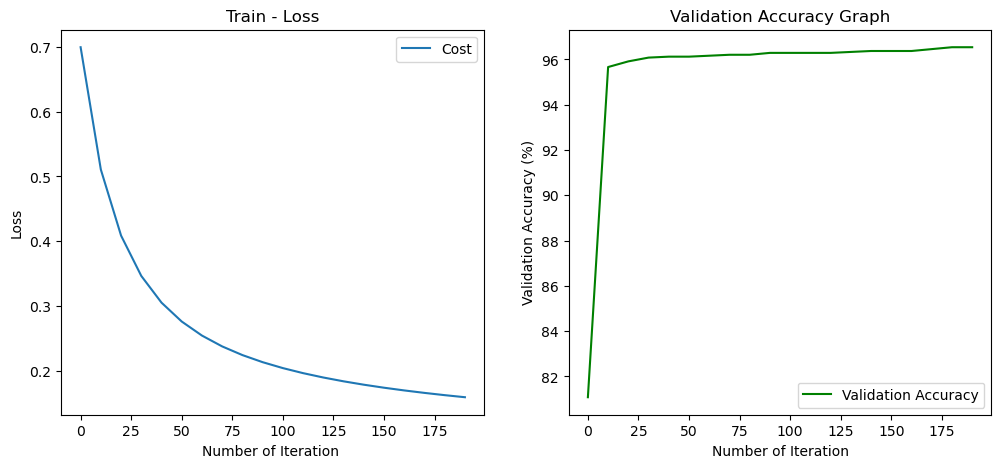

Train Accuracy for Logistic Regression Model: 96.17 %
Validation Accuracy for Logistic Regression Model: 96.58 %
Test Accuracy for Logisctic Regression Model: 95.95 %


In [51]:
parameters = logistic_regression(X_train, Y_train, X_val, Y_val, learning_rate=0.01, num_iterations=200)
y_prediction_test = predict(parameters["weight"], parameters["bias"], X_test)
test_accuracy_logreg = 100 - np.mean(np.abs(y_prediction_test - Y_test)) * 100
print(f"Test Accuracy for Logisctic Regression Model: {test_accuracy_logreg:.2f} %")

* The loss curve decreases steadily over the iterations, indicating that the model is learning properly and minimizing the cost function.
* Validation accuracy quickly improves and stabilizes after the initial iterations, showing that the model converges well without overfitting.

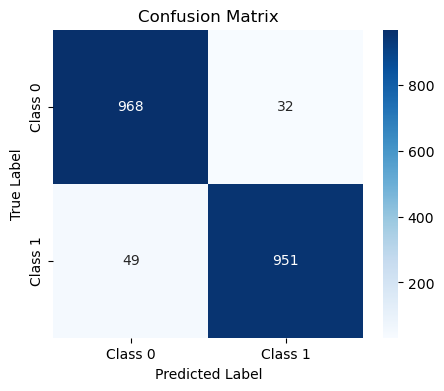

In [52]:
from sklearn.metrics import confusion_matrix

cm_logreg = confusion_matrix(Y_test.T, y_prediction_test.T)

plt.figure(figsize=(5,4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

* 968 True 32 False Predict for Class 0
* 951 True, 49 False Predict for Class 1

## Sklearn Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
logreg_sklearn=LogisticRegression(random_state=42,max_iter=200)
logreg_sklearn.fit(X_train.T, Y_train.T)

LogisticRegression(max_iter=200, random_state=42)

In [55]:
y_pred_val=logreg_sklearn.predict(X_val.T)
val_acc_sklearn = accuracy_score(Y_val.T, y_pred_val)

y_pred_test=logreg_sklearn.predict(X_test.T)
test_acc_sklearn=accuracy_score(Y_test.T, y_pred_test)

In [56]:
print(f"Sklearn Logistic Regression Val Accuracy: {val_acc_sklearn:.4f}")
print(f"Sklearn Logistic Regression Test Accuracy: {test_acc_sklearn:.4f}")


Sklearn Logistic Regression Val Accuracy: 0.9862
Sklearn Logistic Regression Test Accuracy: 0.9925


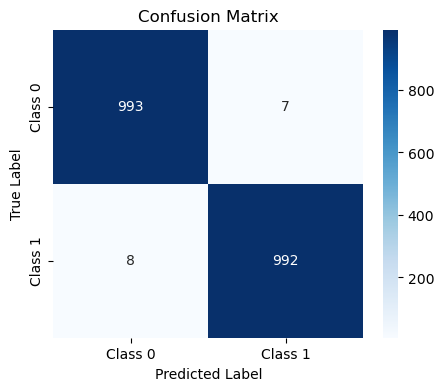

In [57]:
cm_sklearn = confusion_matrix(Y_test.T, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm_sklearn, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 2-Layer Neural Network

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [58]:
def initialize_parameters_and_layer_sizes_2N(X_train,Y_train):
    parameters={"weight1":np.random.randn(3,X_train.shape[0])*0.1, #(3,784) -> (number of hidden layer neurons, input layer size)
                "bias1": np.zeros((3,1)), # a bias for each neuron 
                "weight2": np.random.randn(Y_train.shape[0],3) * 0.1, #(1,3) -> (output layer, number of neurons in hidden layer)
                "bias2": np.zeros((Y_train.shape[0],1))} #(1,1) one bias for output  
    return parameters

In [59]:
def forward_propagation_2N(X_train, parameters):
    Z1=np.dot(parameters["weight1"],X_train)+parameters["bias1"] 
    A1=np.tanh(Z1) #z1 -> tanh activation func
    Z2=np.dot(parameters["weight2"],A1)+parameters["bias2"] 
    A2 = sigmoid(Z2) 

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [60]:
def compute_cost_2N(A2, Y, parameters):
    m = Y.shape[1] #number of sample
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y)) #binary cross entropy
    cost = -np.sum(logprobs) / m
    return cost

In [61]:
def backward_propagation_2N(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [62]:
def update_parameters_2N(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [63]:
def predict_2N(parameters, X_val):
    A2, cache= forward_propagation_2N(X_val,parameters)
    Y_prediction=np.zeros((1,X_val.shape[1]))

    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [65]:
def two_layer_neural_network(X_train, Y_train,X_val,Y_val, num_iterations):
    cost_list = []
    index_list = []
    val_accuracy_list=[]
    parameters = initialize_parameters_and_layer_sizes_2N(X_train, Y_train)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation_2N(X_train,parameters)
        cost = compute_cost_2N(A2, Y_train, parameters)
        grads = backward_propagation_2N(parameters, cache, X_train, Y_train)
        parameters = update_parameters_2N(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)

            y_prediction_val=predict_2N(parameters,X_val)
            val_accuracy = 100 - np.mean(np.abs(y_prediction_val - Y_val)) * 100
            val_accuracy_list.append(val_accuracy)


            print(f"After {i} iterations, cost: {cost:.6f} - Validation Accuracy: {val_accuracy:.2f}%")

            
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.plot(index_list, cost_list,label="Loss")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.title("Cost Graph")
    plt.legend()

     #val accuracy 
    plt.subplot(1,2,2)
    plt.plot(index_list, val_accuracy_list,label="validation accuracy",color="red")
    plt.xlabel("Number of Iteration")
    plt.ylabel("accuracy")
    plt.title("validation accuracy ")
    plt.legend()

    plt.show()
    
    y_prediction_train = predict_2N(parameters,X_train)
    train_accuracy = 100 - np.mean(np.abs(y_prediction_train - Y_train)) * 100

    print(f"train accuracy: {train_accuracy:.2f} %")
    print(f"Validation Accuracy: {val_accuracy_list[-1]:.2f} %")
    return parameters

After 0 iterations, cost: 0.688513 - Validation Accuracy: 51.25%
After 100 iterations, cost: 0.620159 - Validation Accuracy: 89.79%
After 200 iterations, cost: 0.492206 - Validation Accuracy: 93.17%
After 300 iterations, cost: 0.375861 - Validation Accuracy: 94.50%
After 400 iterations, cost: 0.297228 - Validation Accuracy: 95.00%
After 500 iterations, cost: 0.244501 - Validation Accuracy: 95.58%
After 600 iterations, cost: 0.209261 - Validation Accuracy: 96.08%
After 700 iterations, cost: 0.184356 - Validation Accuracy: 96.54%
After 800 iterations, cost: 0.165502 - Validation Accuracy: 96.83%
After 900 iterations, cost: 0.150178 - Validation Accuracy: 96.96%
After 1000 iterations, cost: 0.136877 - Validation Accuracy: 97.33%
After 1100 iterations, cost: 0.125261 - Validation Accuracy: 97.54%
After 1200 iterations, cost: 0.115542 - Validation Accuracy: 97.58%
After 1300 iterations, cost: 0.107613 - Validation Accuracy: 97.67%
After 1400 iterations, cost: 0.101167 - Validation Accuracy:

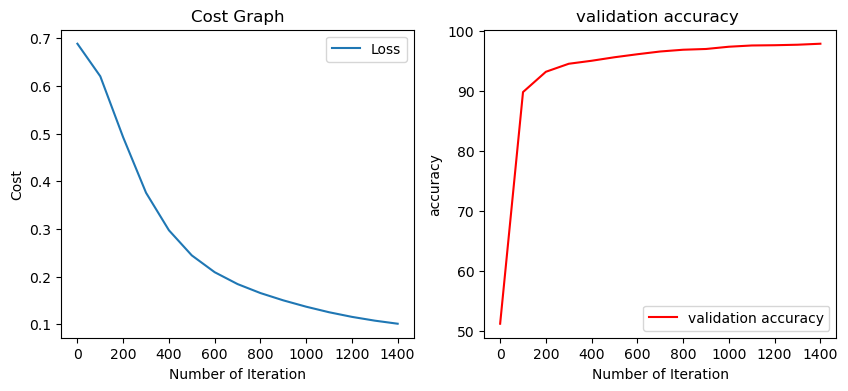

train accuracy: 97.23 %
Validation Accuracy: 97.83 %
Test Accuracy: 97.05 %


In [66]:
parameters = two_layer_neural_network(X_train, Y_train,X_val,Y_val, num_iterations=1500)
y_prediction_test = predict_2N(parameters, X_test)
test_accuracy = 100 - np.mean(np.abs(y_prediction_test - Y_test)) * 100
print(f"Test Accuracy: {test_accuracy:.2f} %")

* The loss decreases consistently over iterations, showing that the two-layer neural network is effectively minimizing the cost function during training.
* Validation accuracy improves rapidly in the early iterations and then stabilizes around 97.8%, indicating good model convergence without significant overfitting.

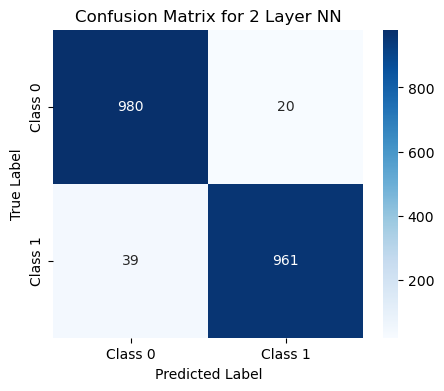

In [67]:
cm_2L = confusion_matrix(Y_test.T, y_prediction_test.T)

plt.figure(figsize=(5,4))
sns.heatmap(cm_2L, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for 2 Layer NN")
plt.show()

## 2 Layer Neural Network with Keras
* input -> hidden layer -> output

In [68]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_val shape", X_val.shape)
print("Y_val shape", Y_val.shape)
print("X_test shape",X_test.shape)
print("Y_test shape", Y_test.shape)

X_train shape (784, 9600)
Y_train shape (1, 9600)
X_val shape (784, 2400)
Y_val shape (1, 2400)
X_test shape (784, 2000)
Y_test shape (1, 2000)


In [69]:
#reshape for keras
X_train, X_val, X_test, Y_train, Y_val, Y_test= X_train.T, X_val.T, X_test.T, Y_train.T, Y_val.T, Y_test.T

print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_val shape", X_val.shape)
print("Y_val shape", Y_val.shape)
print("X_test shape",X_test.shape)
print("Y_test shape", Y_test.shape)

X_train shape (9600, 784)
Y_train shape (9600, 1)
X_val shape (2400, 784)
Y_val shape (2400, 1)
X_test shape (2000, 784)
Y_test shape (2000, 1)


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_2L=Sequential()
model_2L.add(Dense(units=8, activation="relu", input_dim=X_train.shape[1])) #input_dim = number of features units=neuron
model_2L.add(Dense(units=1, activation="sigmoid")) #binary -> output layer
model_2L.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history=model_2L.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 3s 8ms/step - loss: 0.1124 - accuracy: 0.9660 - val_loss: 0.0513 - val_accuracy: 0.9850
Epoch 2/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0533 - accuracy: 0.9807 - val_loss: 0.0442 - val_accuracy: 0.9842
Epoch 3/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0455 - accuracy: 0.9832 - val_loss: 0.0396 - val_accuracy: 0.9887
Epoch 4/30
300/300 [==============================] - 2s 8ms/step - loss: 0.0406 - accuracy: 0.9848 - val_loss: 0.0348 - val_accuracy: 0.9879
Epoch 5/30
300/300 [==============================] - 2s 8ms/step - loss: 0.0380 - accuracy: 0.9871 - val_loss: 0.0348 - val_accuracy: 0.9879
Epoch 6/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0346 - accuracy: 0.9882 - val_loss: 0.0339 - val_accuracy: 0.9879
Epoch 7/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0337 - accuracy: 0.9882 - val_loss: 0.0337 - val_accuracy: 0.9887
Epoch 

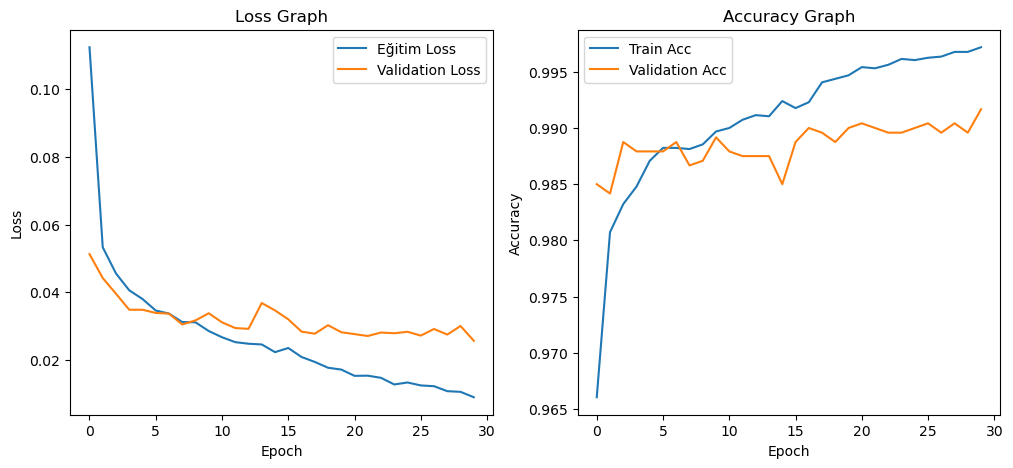

In [71]:
plt.figure(figsize=(12,5))

#loss graph
plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Eğitim Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.legend()

#accuracy 
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Train Acc")
plt.plot(history.history["val_accuracy"],label="Validation Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.legend()

plt.show()

* Training loss and validation loss decrease steadily, with slight fluctuations in validation loss after 15 epochs, suggesting a minor variance but no major overfitting. 
* Training accuracy improves consistently, while validation accuracy remains stable around 99%, indicating strong generalization without overfitting.

In [72]:
# now lets look at the performance on the test set 
y_pred_test_2L=model_2L.predict(X_test)
y_pred_test_2L = (y_pred_test_2L > 0.5).astype(int)

test_acc_2L=accuracy_score(Y_test, y_pred_test_2L)
print(f"Test Accuracy for 2 Layer NN: {test_acc_2L:.4f}")


63/63 [==============================] - 1s 4ms/step
Test Accuracy for 2 Layer NN: 0.9950


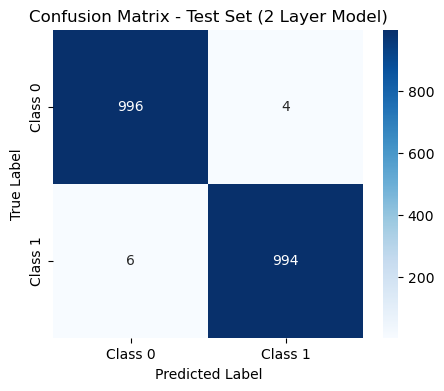

In [73]:
y_pred_test_2L_labels = (y_pred_test_2L > 0.5).astype(int)

cm_2LK=confusion_matrix(Y_test, y_pred_test_2L_labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm_2LK, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set (2 Layer Model)")
plt.show()

## L - Layer NN

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_LL=Sequential()
model_LL.add(Dense(units=64, activation="relu",input_dim=X_train.shape[1]))
model_LL.add(Dense(units=32, activation="relu"))
model_LL.add(Dense(units=16, activation="relu"))
model_LL.add(Dense(units=1, activation="sigmoid"))

model_LL.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history_LL = model_LL.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=30, batch_size=32)


Epoch 1/30
300/300 [==============================] - 4s 10ms/step - loss: 0.0818 - accuracy: 0.9728 - val_loss: 0.0441 - val_accuracy: 0.9875
Epoch 2/30
300/300 [==============================] - 3s 8ms/step - loss: 0.0393 - accuracy: 0.9867 - val_loss: 0.0311 - val_accuracy: 0.9892
Epoch 3/30
300/300 [==============================] - 3s 11ms/step - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0339 - val_accuracy: 0.9896
Epoch 4/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0277 - accuracy: 0.9902 - val_loss: 0.0263 - val_accuracy: 0.9896
Epoch 5/30
300/300 [==============================] - 3s 9ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0342 - val_accuracy: 0.9875
Epoch 6/30
300/300 [==============================] - 3s 11ms/step - loss: 0.0200 - accuracy: 0.9924 - val_loss: 0.0205 - val_accuracy: 0.9933
Epoch 7/30
300/300 [==============================] - 3s 9ms/step - loss: 0.0147 - accuracy: 0.9943 - val_loss: 0.0355 - val_accuracy: 0.9879
Ep

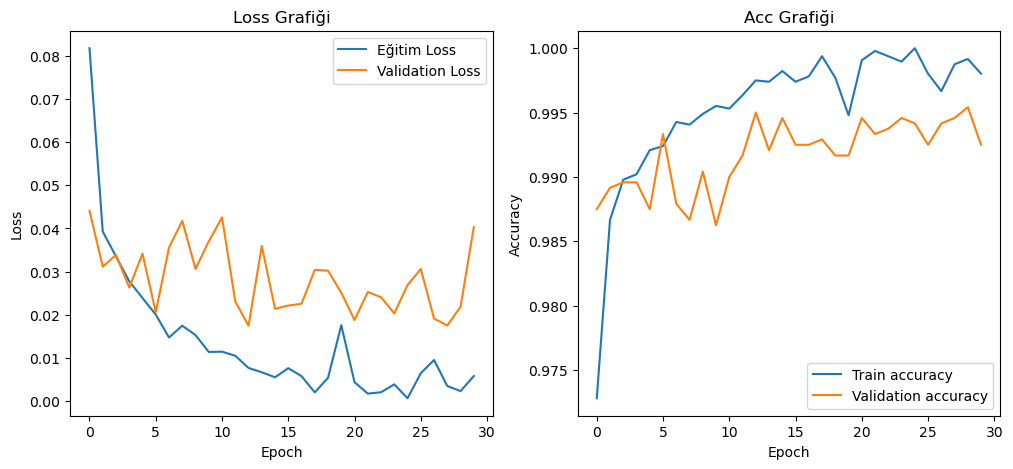

In [76]:
plt.figure(figsize=(12,5))

#loss 
plt.subplot(1,2,1)
plt.plot(history_LL.history["loss"],label="Eğitim Loss")
plt.plot(history_LL.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Grafiği")
plt.legend()

#acc
plt.subplot(1,2,2)
plt.plot(history_LL.history["accuracy"],label="Train accuracy")
plt.plot(history_LL.history["val_accuracy"],label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Acc Grafiği")
plt.legend()
plt.show()

* Training loss decreases steadily to very low values, while validation loss fluctuates, suggesting a small amount of variance but no major overfitting.
* Training accuracy reaches nearly 100%, while validation accuracy remains stable around 99%, indicating very strong learning with slight variance on unseen data.

In [77]:
y_pred_test_LL=model_LL.predict(X_test)
y_pred_test_LL=(y_pred_test_LL > 0.5).astype(int)

test_acc_LL=accuracy_score(Y_test,y_pred_test_LL)
print(f"Test Accuracy LL: {test_ac_LL:.4f}")


63/63 [==============================] - 1s 7ms/step
Test Accuracy LL: 0.9950


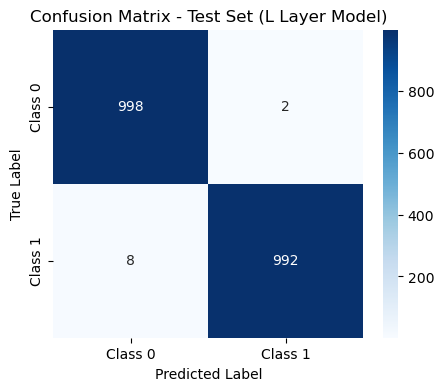

In [79]:
cm_LL = confusion_matrix(Y_test, y_pred_test_LL)

plt.figure(figsize=(5,4))
sns.heatmap(cm_LL, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Class 0", "Class 1"], 
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set (L Layer Model)")
plt.show()

# Summary 
- In This Notebook :
    * prepared and visualized the data for labels 0 and 1.
    * trained, and evaluated the performance of a manual Logistic Regression model.
    * Logistic Regression using Sklearn and compared the results.
    * two-layer Neural Network both manually and using Keras, and analyzed their performance.
    * L-layer Neural Network and trained it with Keras.

* In The Next Notebook
  *  two-layer Neural Network for 10 different labels and evaluate its performance.
  *  L-layer Neural Network to perform multi-class classification.
  *  CNN (Convolutional Neural Network) model and evaluate its performance.
  *  I will use Keras Tuner to optimize the hyperparameters of the CNN model and aim to achieve the best performance.